## Visualiztaion of the ROA-size relation by Bi4/Non-Big 4

-------------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
pd.set_option('display.max_columns', None)

### Load Compustat data (fyear= 2020)

In [4]:
df= pd.read_csv("compustat_from_1990.csv")
df= df[(df.fyear>=2019)&(df.fyear<=2020)]
print(df.shape)

(10461, 13)


### Define variables

In [5]:
df=df[df['at']!= 0]
df['log_at']= np.log(1+df['at'])
df['sale_at']= df['sale'] / df['at']
df['lag_at']= df.groupby('gvkey')['at'].shift(1)
df['ROA']= df['ni'] / df['lag_at']
df['big4']= 0
df.loc[(df.au >=4) & (df.au <= 7), 'big4']= 1
print(df.shape)
df.head()

(10426, 18)


,conm,gvkey,cik,datadate,au,fyear,at,sale,ni,ib,oancf,sich,mv,log_at,sale_at,lag_at,ROA,big4
29,AAR CORP,1004,1750.0,2020-05-31,6.0,2019,2079.000,2089.300,4.400,24.800,-36.100,5080.0,707.90649,7.640123,1.004954,NaN,NaN,1
30,AAR CORP,1004,1750.0,2021-05-31,6.0,2020,1539.700,1651.400,35.800,46.300,105.200,5080.0,1476.90625,7.339992,1.072547,2079.0,0.017220,1
217,AMERICAN AIRLINES GROUP INC,1045,6201.0,2019-12-31,6.0,2019,59995.000,45768.000,1686.000,1686.000,3815.000,4512.0,12280.86204,11.002033,0.762864,NaN,NaN,1
218,AMERICAN AIRLINES GROUP INC,1045,6201.0,2020-12-31,6.0,2020,62008.000,17337.000,-8885.000,-8885.000,-6543.000,4512.0,9800.73960,11.035035,0.279593,59995.0,-0.148096,1
254,CECO ENVIRONMENTAL CORP,1050,3197.0,2019-12-31,11.0,2019,408.637,341.869,17.707,17.707,10.227,3564.0,269.14942,6.015271,0.836608,NaN,NaN,0


### Drop outliers

In [6]:
df= df[['ROA', 'log_at', 'sale_at', 'big4']]
df.dropna(how='any', inplace= True)
df=df[(df.ROA > -0.8) & (df.ROA < 0.5)]
df=df[(df.sale_at<3)]
print(df.shape)
df.head()

(4166, 4)


,ROA,log_at,sale_at,big4
30,0.017220,7.339992,1.072547,1
218,-0.148096,11.035035,0.279593,1
255,0.020094,6.041002,0.753638,0
355,0.029793,9.904558,0.179166,1
416,0.066213,11.192017,0.477036,1


### Visualization - Scatterplot

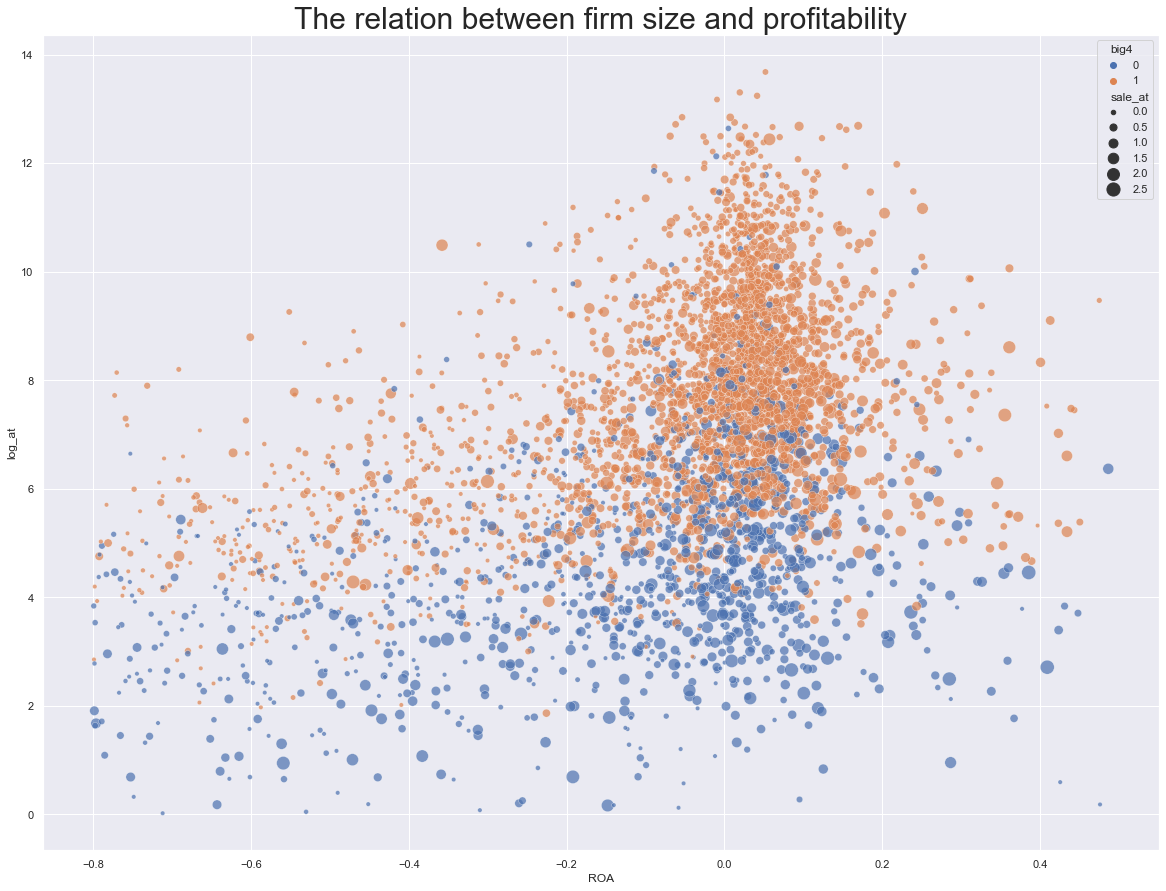

In [7]:
sns.set(rc={'figure.figsize':(20,15)})
p= sns.scatterplot(x=df['ROA'], y=df['log_at'], hue= df['big4'], size= df['sale_at'], sizes=(20,200), alpha=0.7)
p.set_title('The relation between firm size and profitability', fontsize = 30)
plt.show()

* The relation between firm size (log_at) and profitability (ROA)
* Blue circles: Big 4 clients
* Orange circles: Big 4 clients
* The size of circle: sale_at